# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.462  1  0.777 0.379 0.004   
                             age        0.174  1  0.293 0.589 0.002   
                             Kiel       2.409  1  4.053 0.046 0.021   
                             Magdeburg  4.991  1  8.395 0.004 0.042   
                             Sweden     8.043  1 13.530 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.147  1  1.199 0.275 0.006   
                             age        0.178  1  0.186 0.666 0.001   
                             Kiel       0.084  1  0.088 0.767 0.000   
                             Magdeburg  1.115  1  1.165 0.282 0.006   
                             Sweden    23.418  1 24.466 0.000 0.114   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.421  0.542    False  
                             age               0.230  0.723    False  
                             Kiel              1.342  0.113    False  
                             Magdeburg         2.377  0.016     True  
                             Sweden            3.515  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.561  0.434    False  
                             age               0.176  0.784    False  
                             Kiel              0.115  0.857    False  
                             Magdeburg         0.550  0.442    False  
                             Sweden            5.782  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.549  1  3.514 0.062 0.018   
                             age        0.019  1  0.123 0.727 0.001   
                             Kiel       0.411  1  2.635 0.106 0.014   
                             Magdeburg  0.927  1  5.940 0.016 0.030   
                             Sweden     2.402  1 15.385 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.444  1  1.326 0.251 0.007   
                             age        2.191  1  1.189 0.277 0.006   
                             Kiel       9.572  1  5.193 0.024 0.026   
                             Magdeburg 18.515  1 10.045 0.002 0.050   
                             Sweden     0.254  1  0.138 0.711 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.205  0.136    False  
                             age               0.139  0.818    False  
                             Kiel              0.974  0.206    False  
                             Magdeburg         1.804  0.045     True  
                             Sweden            3.913  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.600  0.397    False  
                             age               0.558  0.426    False  
                             Kiel              1.624  0.063    False  
                             Magdeburg         2.750  0.007     True  
                             Sweden            0.148  0.806    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.379         0.421  0.542    False   
                             Kiel      0.046         1.342  0.113    False   
                             Magdeburg 0.004         2.377  0.016     True   
                             Sweden    0.000         3.515  0.002     True   
                             age       0.589         0.230  0.723    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.275         0.561  0.434    False   
                             Kiel      0.767         0.115  0.857    False   
                             Magdeburg 0.282         0.550  0.442    False   
                             Sweden    0.000         5.782  0.000     True   
                             age       0.666         0.176  0.784    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.062         1.205  0.136    False  
                             Kiel      0.106         0.974  0.206    False  
                             Magdeburg 0.016         1.804  0.045     True  
                             Sweden    0.000         3.913  0.001     True  
                             age       0.727         0.139  0.818    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.251         0.600  0.397    False  
                             Kiel      0.024         1.624  0.063    False  
                             Magdeburg 0.002         2.750  0.007     True  
                             Sweden    0.711         0.148  0.806    False  
                             age       0.277         0.558  0.426    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.485     0.337     0.246         2.734     0.313
std       0.303         5.362     0.331     0.298         5.161     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.333     0.014     0.002         0.360     0.008
50%       0.120         0.921     0.240     0.092         1.034     0.185
75%       0.465         2.451     0.620     0.437         2.714     0.582
max       0.999       146.802     0.999     1.000        82.631     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_33963/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.379         0.421   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.331   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.091         1.040   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.547         0.262   
A0A075B6H7                                         AD     0.054         1.268   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.016         1.794   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.179         0.748   
S4R3U6                                             AD     0.275         0.561   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.542    False   
A0A024R0T9;K7ER74;P02655                           AD      0.115    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.194    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.690    False   
A0A075B6H7                                         AD      0.129    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.049     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.321    False   
S4R3U6                                             AD      0.434    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.062         1.205   
A0A024R0T9;K7ER74;P02655                           AD     0.028         1.548   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.359         0.445   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.294         0.532   
A0A075B6H7                                         AD     0.039         1.410   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.325   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.435         0.362   
S4R3U6                                             AD     0.251         0.600   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.136    False  
A0A024R0T9;K7ER74;P02655                           AD      0.072    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.511    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.443    False  
A0A075B6H7                                         AD      0.093    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.400     0.335     0.254         1.478     0.326
std       0.292         1.611     0.317     0.296         1.777     0.320
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.369     0.037     0.010         0.343     0.031
50%       0.124         0.906     0.246     0.108         0.967     0.208
75%       0.428         1.950     0.586     0.454         2.000     0.598
max       0.998        21.467     0.998     0.999        25.607     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,1002


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.379         0.421  0.542   
A0A024R0T9;K7ER74;P02655                           0.047         1.331  0.115   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.091         1.040  0.194   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.547         0.262  0.690   
A0A075B6H7                                         0.054         1.268  0.129   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.016         1.794  0.049   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.179         0.748  0.321   
S4R3U6                                             0.275         0.561  0.434   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.062   
A0A024R0T9;K7ER74;P02655                              False 0.028   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.359   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.294   
A0A075B6H7                                            False 0.039   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.047   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.435   
S4R3U6                                                False 0.251   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.205  0.136   
A0A024R0T9;K7ER74;P02655                                   1.548  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.445  0.511   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.532  0.443   
A0A075B6H7                                                 1.410  0.093   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.304   
Q9Y6X5                                                     1.325  0.108   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.362  0.580   
S4R3U6                                                     0.600  0.397   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    967
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    62
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_33963/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                               QRILC  \
                                p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                              
A0A075B6I0                      0.027         1.563  0.076    False 0.002   
A0A087WWT2;Q9NPD7               0.045         1.345  0.112    False 0.005   
A0A087X0M8                      0.024         1.627  0.068    False 0.003   
A0A0B4J231;B9A064               0.052         1.285  0.125    False 0.001   
A0A0C4DGV4;E9PLX3;O43504;R4GMU8 0.005         2.326  0.018     True 0.035   
...                               ...           ...    ...      ...   ...   
Q9NRB3                          0.492         0.308  0.645    False 0.012   
Q9NYX4                          0.048         1.320  0.117    False 0.008   
Q9P0K9                          0.068         1.165  0.155    False 0.015   
Q9UQ52                          0.090         1.047  0.192    False 0.003   
Q9Y6X5                          0.016         1.794  0.049     True 0.047   

                                                                   data  
                                -Log10 pvalue qvalue rejected frequency  
protein groups                                                           
A0A075B6I0                              2.641  0.009     True       194  
A0A087WWT2;Q9NPD7                       2.310  0.017     True       193  
A0A087X0M8                              2.504  0.012     True       189  
A0A0B4J231;B9A064                       3.070  0.004     True       196  
A0A0C4DGV4;E9PLX3;O43504;R4GMU8         1.454  0.086    False        55  
...                                       ...    ...      ...       ...  
Q9NRB3                                  1.931  0.035     True        82  
Q9NYX4                                  2.071  0.027     True       195  
Q9P0K9                                  1.833  0.042     True       192  
Q9UQ52                                  2.529  0.011     True       188  
Q9Y6X5                                  1.325  0.108    False       173  

[97 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.542,0.136,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.115,0.072,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.194,0.511,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.690,0.443,196,PI (no) - QRILC (no)
A0A075B6H7,0.129,0.093,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.304,197,PI (no) - QRILC (no)
Q9Y6X5,0.049,0.108,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.935,0.008,86,PI (no) - QRILC (yes),0.928
Q9NRB3,0.645,0.035,82,PI (no) - QRILC (yes),0.610
F5GWE5;I3L2X8;I3L3W1;I3L459;I3L471;I3L4C0;I3L4H1;I3L4U7;Q00169,0.637,0.049,78,PI (no) - QRILC (yes),0.588
P68104;Q5VTE0,0.569,0.036,163,PI (no) - QRILC (yes),0.533
P43004;P43004-2;P43004-3,0.533,0.016,89,PI (no) - QRILC (yes),0.517
...,...,...,...,...,...
F8WBF9;Q5TH30;Q9UGV2;Q9UGV2-2;Q9UGV2-3,0.035,0.060,90,PI (yes) - QRILC (no),0.026
Q13867,0.050,0.035,127,PI (no) - QRILC (yes),0.015
P26572,0.055,0.042,194,PI (no) - QRILC (yes),0.012


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


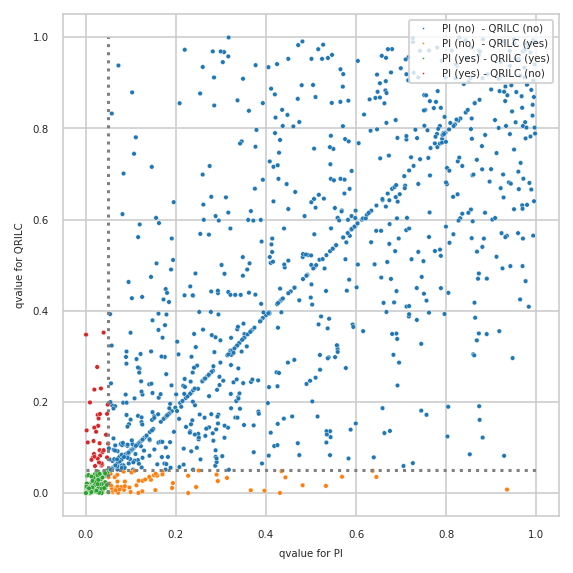

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


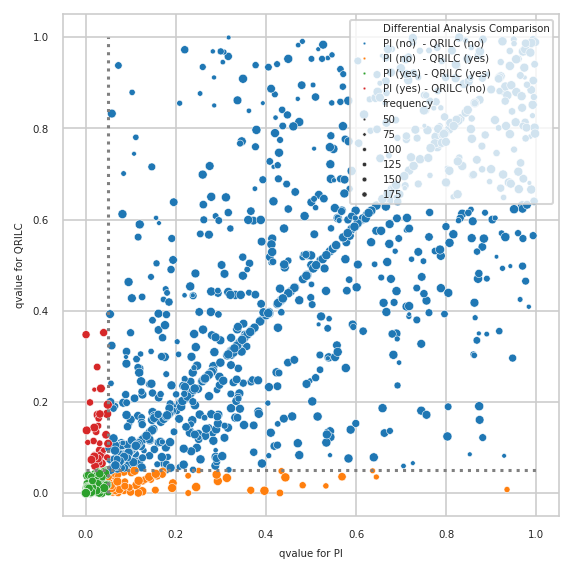

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681
MOB4,ENSP00000315702,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out